# Final Project: Analyzing Historical Stock/Revenue Data and Building a Dashboard
This notebook extracts stock data using `yfinance` and revenue data using web scraping to compare the performance of Tesla and GameStop.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [2]:
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")
tesla_stock.reset_index(inplace=True)
tesla_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_tesla = requests.get(url_tesla, headers={'User-Agent': 'Mozilla/5.0'}).text
soup_tesla = BeautifulSoup(html_tesla, "html.parser")

# Find the table manually by keyword
tables = pd.read_html(html_tesla)
for table in tables:
    if "Tesla Quarterly Revenue" in table.columns[0]:
        tesla_revenue = table
        break

# Clean and process data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[$,]", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue.head()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_18932\3487744411.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_tesla)


,Date,Revenue
0,2025-03-31,19335.0
1,2024-12-31,25707.0
2,2024-09-30,25182.0
3,2024-06-30,25500.0
4,2024-03-31,21301.0


In [7]:
gme = yf.Ticker("GME")
gme_stock = gme.history(period="max")
gme_stock.reset_index(inplace=True)
gme_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [9]:

# Use headers to mimic a browser
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_gme = requests.get(url_gme, headers={'User-Agent': 'Mozilla/5.0'}).text

# Extract tables safely
tables = pd.read_html(html_gme)

# Find the correct table based on column name
for table in tables:
    if "GameStop Quarterly Revenue" in table.columns[0]:
        gme_revenue = table
        break

# Clean data
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[$,]", "", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

gme_revenue.head()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_18932\1445782394.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_gme)


,Date,Revenue
0,2025-04-30,732
1,2025-01-31,1283
2,2024-10-31,860
3,2024-07-31,798
4,2024-04-30,882


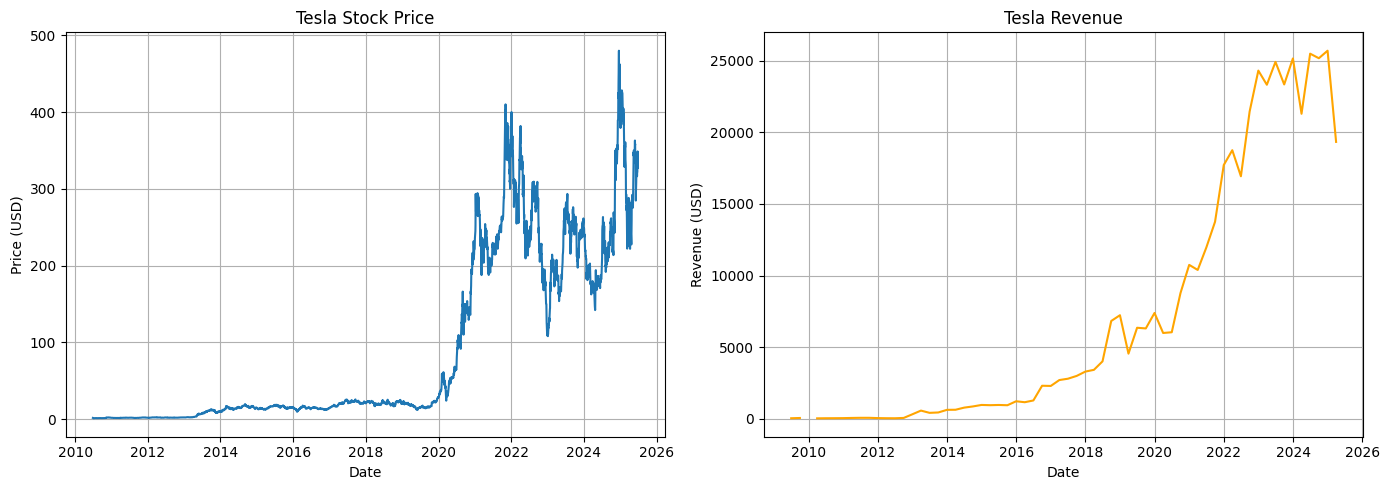

In [10]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(tesla_stock['Date'], tesla_stock['Close'], label='Stock Price')
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='orange', label='Revenue')
plt.title("Tesla Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

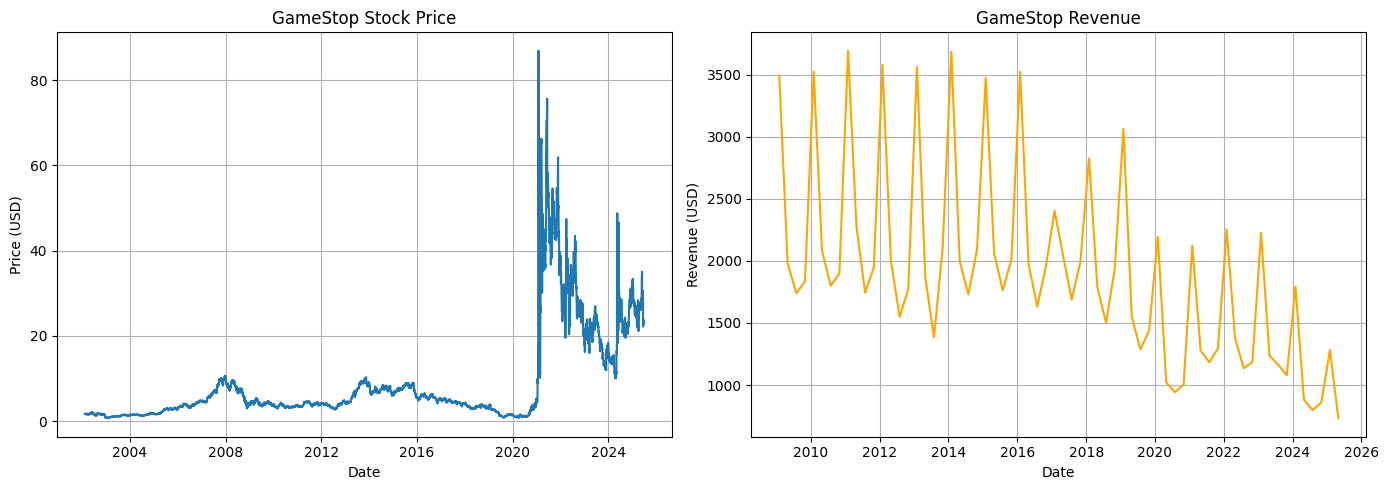

In [11]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(gme_stock['Date'], gme_stock['Close'], label='Stock Price')
plt.title("GameStop Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='orange', label='Revenue')
plt.title("GameStop Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Sharing Your Notebook
To complete the assignment:
1. Take screenshots of code and results for each section.
2. Save and share the notebook on [watsonx.ai](https://dataplatform.cloud.ibm.com/).
3. Submit the notebook link in your Coursera assignment.